# Challenge 3

In [2]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style
import matplotlib as mpl
%matplotlib inline



#### Import the titanic file. Name your dataset `titanic`.

In [4]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [5]:
#your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [12]:
# your code here- numerical variable
titanic.select_dtypes(exclude='object')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [14]:
#your code here- categorical variable
titanic.select_dtypes(include='object')


,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [8]:
# your code here
mpl.style.use('classic')
plt.figure(figsize=(12,6))

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the appropriate visulalization to show the distribution of the column `Age`

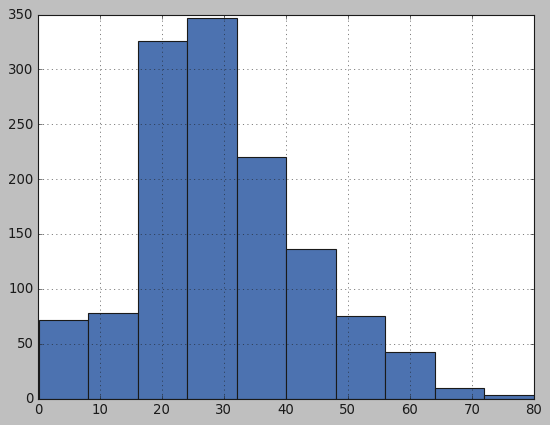

In [9]:
# your code here
titanic['Age'].hist()
plt.show()

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

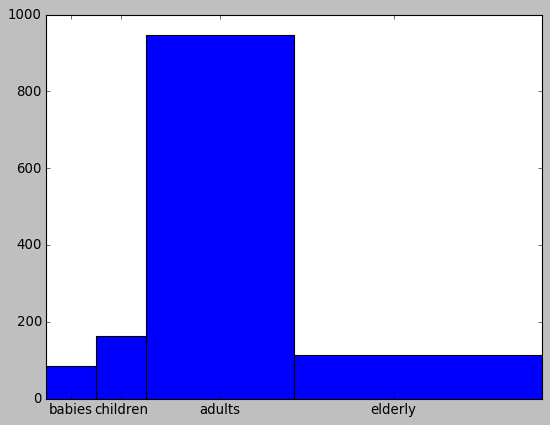

In [15]:
# your code here
labels=['babies', 'children', 'adults', 'elders']
plt.hist(titanic['Age'], bins=[0,10.00,20.00,50.00,100.00], label=labels, rwidth=5)
plt.xticks([5,15,35,70], ['babies', 'children', 'adults', 'elderly'])
plt.show()

#### Whether the bin size affects your plot? Why?

Sí, el ancho de la barra sigue el tamaño de la bandeja

#### Use seaborn to show the distribution of the column `Age`

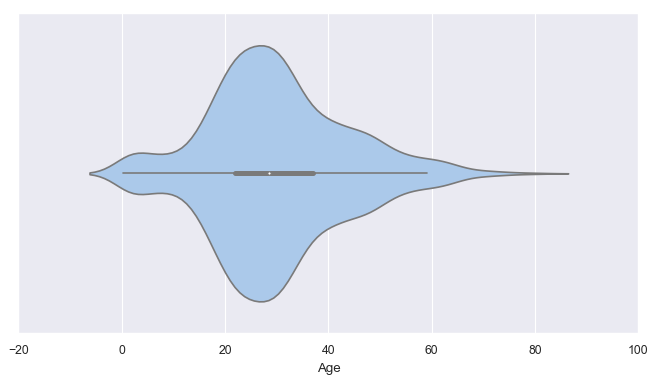

In [12]:
# your code here
sns.set(rc={'figure.figsize':(10,5)})
sns.violinplot('Age', data=titanic, palette='pastel')

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

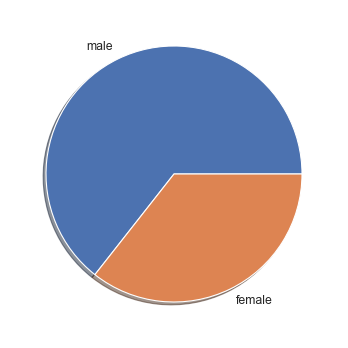

In [29]:
# your code here- 1st way
labels = ['male', 'female']
fig, ax1 = plt.subplots()
ax1.pie(titanic['Gender'].value_counts(), labels=labels, shadow=True)
plt.show()

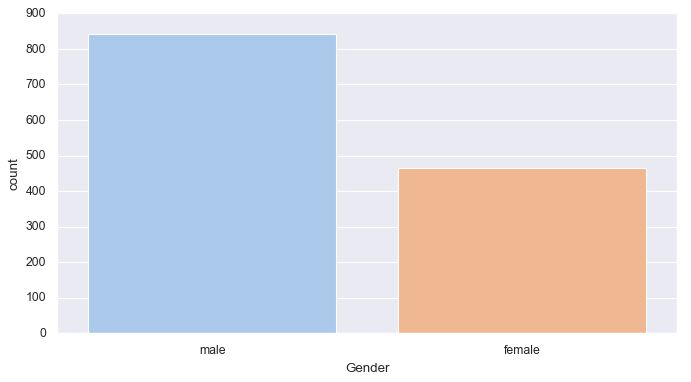

In [33]:
# your code here- 2nd way
sns.countplot(x='Gender', data=titanic, palette='pastel')

#### Use the appropriate plot to visualize the column `Pclass` 


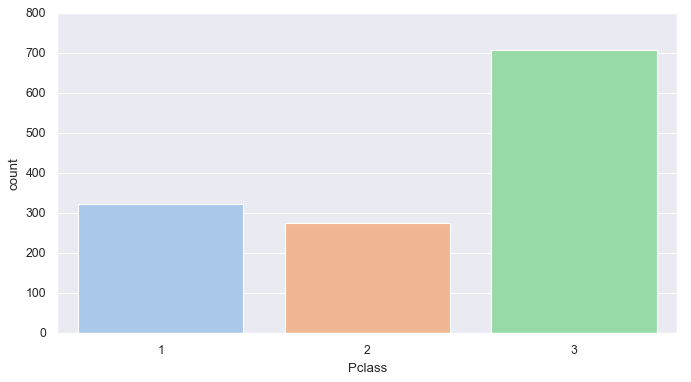

In [34]:
# your code here
sns.countplot(x='Pclass', data=titanic, palette='pastel')

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

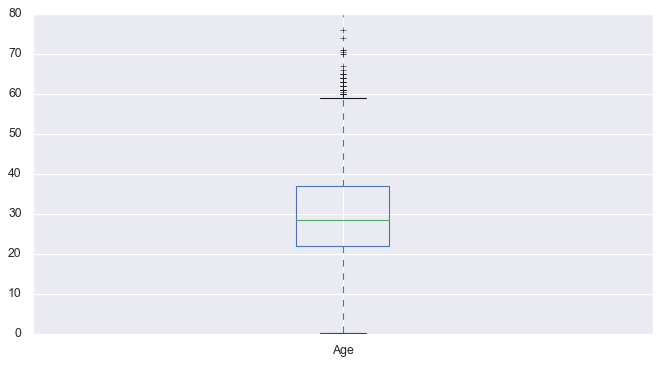

In [35]:
# your code here
titanic.boxplot(column='Age')

#### What does the previous plot tell you about the feature `Age`? Comment.

Según lo anterior, las edades de los pasasjeros estaban comprendidas entre 20 y 40 años aprox.

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

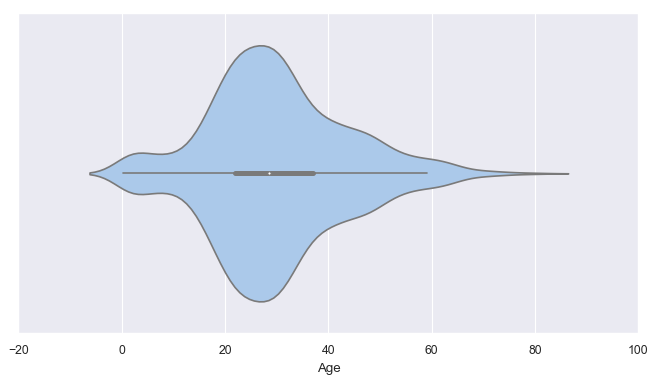

In [36]:
#your code here
sns.set(rc={'figure.figsize':(10,5)})
sns.violinplot('Age', data=titanic, palette='pastel')

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

La edad media es de alrededor de 30 años y es un poco más baja que la mediana.

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

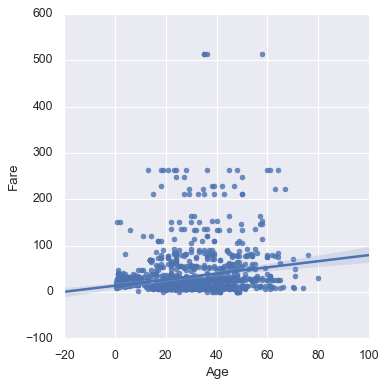

In [38]:
#your code-1st way
sns.lmplot('Age', 'Fare', data=titanic, fit_reg=True)

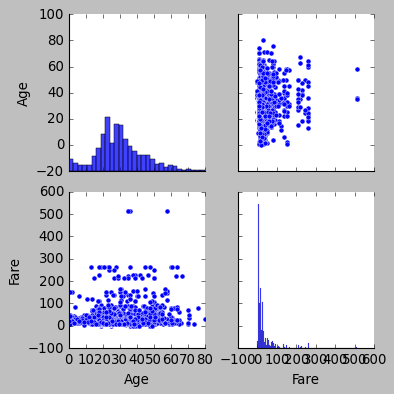

In [16]:
# your code-2nd way
sns.pairplot(titanic, vars=['Age', 'Fare'])

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

<AxesSubplot:>

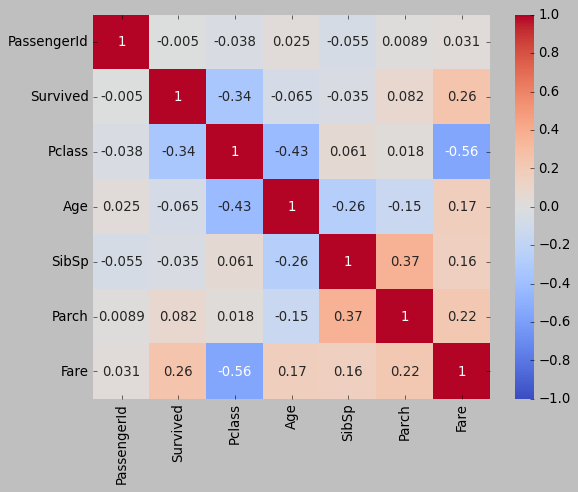

In [17]:
#your code here
sns.heatmap(titanic.corr(), vmin=-1, cmap='coolwarm', annot=True)

#### According to the previous plot, what are the most correlated feature? Comment.

Las características más correlacionadas son Fare vs Pclass, luego gender_num vs sobrevivió

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

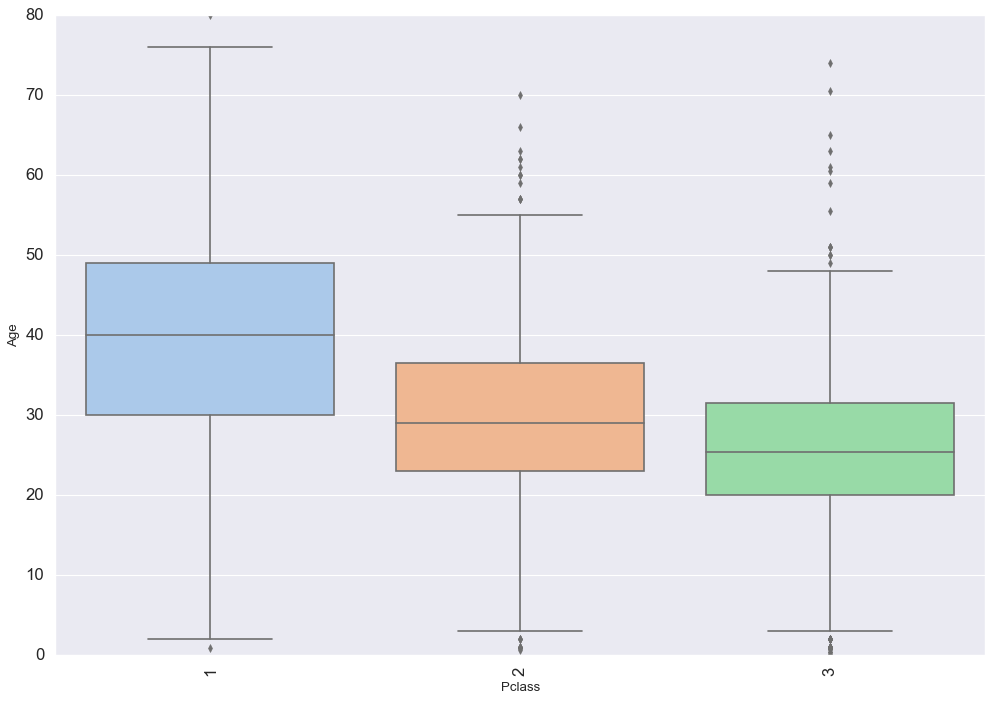

In [44]:
#your code here
ax = sns.boxplot(x='Pclass', 
                 y='Age', 
                 data=titanic, palette='pastel')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.tick_params(labelsize=15)

#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

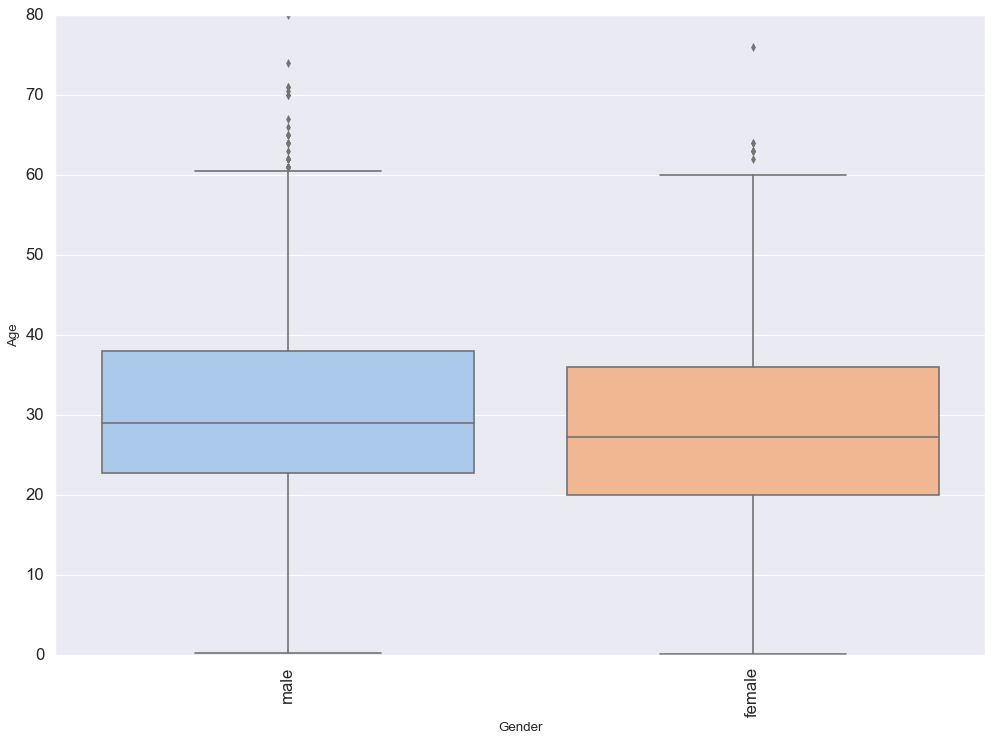

In [45]:
#your code here
ax = sns.boxplot(x='Gender', 
                 y='Age', 
                 data=titanic, palette='pastel')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.tick_params(labelsize=15)